In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = np.loadtxt('linear_regression_data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]), data[:, 0]]
y = np.c_[data[:, 1]]

Text(0, 0.5, 'Profit in $10,000s')

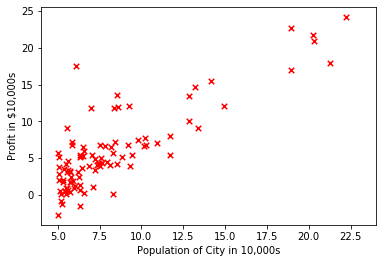

In [3]:
plt.scatter(X[:, 1], y, s=30, marker='x', c='r', linewidths=1)
plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

#### 损失函数

In [4]:
def computeCost(X, y, theta=[[0], [0]]):
    m = y.size
    J = 0
    h = X.dot(theta)
    J = 1.0/(2*m) * np.sum(np.square(h - y))
    
    return J

In [5]:
computeCost(X, y)

32.072733877455676

#### 梯度下降

In [6]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for i in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha * (1.0/m)*(X.T.dot(h -y))
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history

theta:  [-3.63029144  1.16636235]


Text(0.5, 0, 'Iterations')

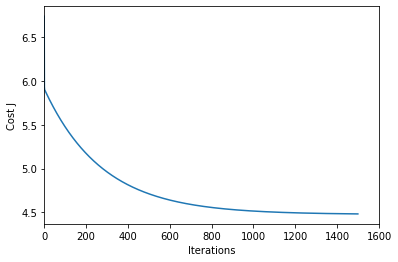

In [7]:
#画出每一次迭代和损失函数变化
theta, Cost_J = gradientDescent(X, y)
print('theta: ', theta.ravel())

plt.plot(Cost_J)
plt.xlim(0, 1600)
plt.ylabel('Cost J')
plt.xlabel('Iterations')

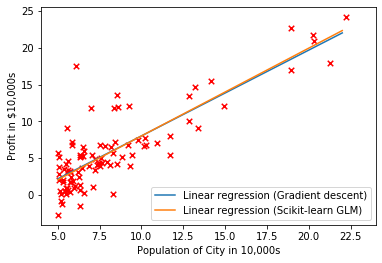

In [8]:
xx = np.arange(5, 23)
yy = theta[0] + theta[1] * xx

# 画出我们自己写的线性回归梯度下降收敛的情况
plt.scatter(X[:, 1], y, s=30, marker='x', c='r', linewidths=1)
plt.plot(xx, yy, label='Linear regression (Gradient descent)')

# 和Scikit-learn中的线性回归对比一下 
regr = LinearRegression()
regr.fit(X[:, 1].reshape(-1, 1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4)

In [9]:
# 预测一下人口为35000和70000的城市的结果
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]
